# This is the file for feature engineering and also model test

### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Data Loading and Checking

In [2]:
train_df = pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

Check the data

In [3]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_df.shape

(1460, 81)

There are 1460 samples that we can use to train our model and 79 features and 1 target variable

Check the columns of the dataset

In [5]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [165]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
train_df.get_dtype_counts()

float64     3
int64      35
object     43
dtype: int64

We can see from the data structure, except for ID and SalePrice, there are 36 numerical features and 43 categorical features.

## Feature Engineering

First we check the data completility 

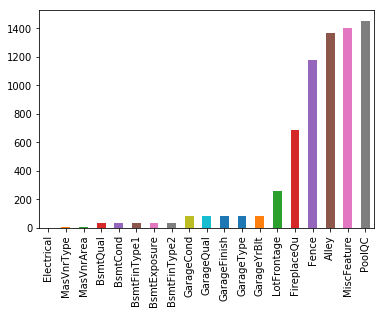

In [7]:
missing = train_df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

Drop those features that have too many missing values

In [8]:
train=train_df.drop("Alley", 1)
train=train.drop("Fence", 1)
train=train.drop("MiscFeature", 1)
train=train.drop("PoolQC", 1)
train=train.drop("FireplaceQu", 1)

In [9]:
train.get_dtype_counts()

float64     3
int64      35
object     38
dtype: int64

We still have 74 features, 36 are numerical, 38 are categorical.

In [10]:
#checking the skewness of dataset
train.skew()

Id                0.000000
MSSubClass        1.407657
LotFrontage       2.163569
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.669084
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.649415
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
S

Since we noticed there are some variables have significant skewness, we try to use the log transformation to make them more normal distributed, first we take a look at the distribution change for the target variable SalePrice.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1153ef9e8>,
      dtype=object)

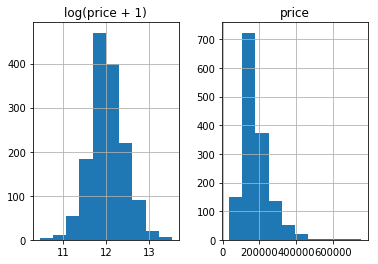

In [11]:
prices = pd.DataFrame({"price":train["SalePrice"], "log(price + 1)":np.log1p(train["SalePrice"])})
prices.hist()

We can see the target would be more like normal distributed, so we make the same transformation to other variable that are highly skewed (skewness>1)

In [12]:
from scipy.stats import skew
#log transform the target:
train["SalePrice"] = np.log1p(train["SalePrice"])

#log transform skewed numeric features:
numeric_feats = train.dtypes[train.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 1]
skewed_feats = skewed_feats.index

train[skewed_feats] = np.log1p(train[skewed_feats])


Creating matrices for sklearn:

In [20]:
X = train.drop(['SalePrice'],axis=1)
y = train.SalePrice

Create the dummy variables for categorical data

In [21]:
all_data = pd.get_dummies(X)

Fill the missing value with mean of the column

In [22]:
all_data = all_data.fillna(all_data.mean())

Check the transformed dataset

In [24]:
all_data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,4.110874,4.189655,9.042040,7,5,2003,2003,5.283204,6.561031,...,0,0,0,1,0,0,0,0,1,0
1,2,3.044522,4.394449,9.169623,6,8,1976,1976,0.000000,6.886532,...,0,0,0,1,0,0,0,0,1,0
2,3,4.110874,4.234107,9.328212,7,5,2001,2002,5.093750,6.188264,...,0,0,0,1,0,0,0,0,1,0
3,4,4.262680,4.110874,9.164401,7,5,1915,1970,0.000000,5.379897,...,0,0,0,1,1,0,0,0,0,0
4,5,4.110874,4.442651,9.565284,8,5,2000,2000,5.860786,6.486161,...,0,0,0,1,0,0,0,0,1,0


### Feature Correlation Analysis

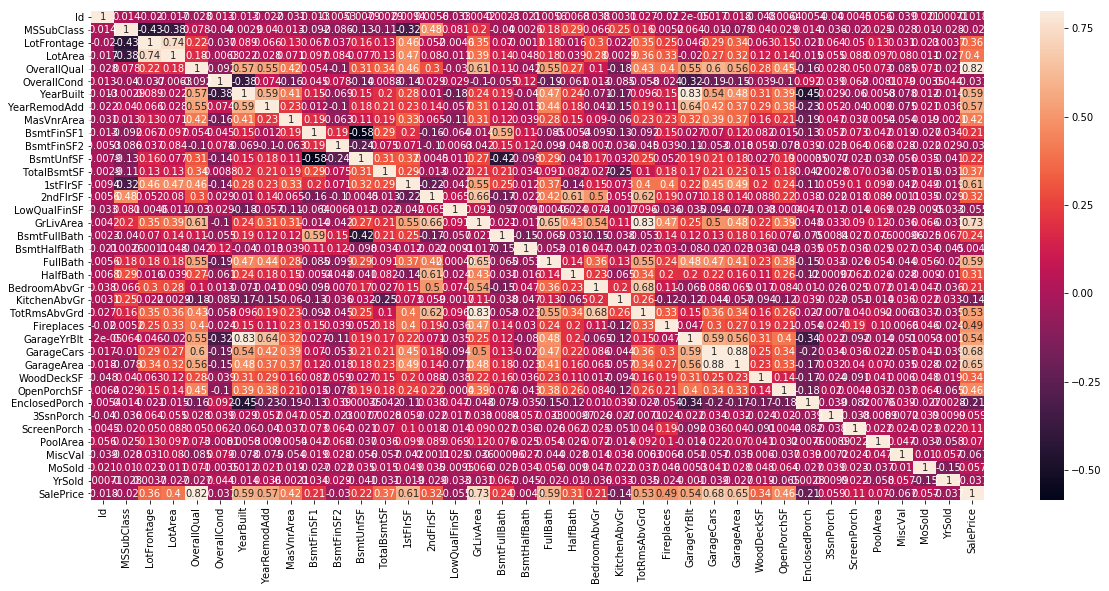

In [16]:
#correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=.8, annot=True)

Since there are still too many features that could lead to overfitting, we use two ways to reduce feature, PCA and manually pick 5 

Feature reduction by PCA

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=36,whiten=True)
pca = pca.fit(all_data)
dataPCA = pca.transform(all_data)

Feature reduction by mannually select features

In [30]:
predictor_cols=['GrLivArea', 'OverallQual', 'YearBuilt', 'TotRmsAbvGrd','LotFrontage']
SelectData=all_data[predictor_cols]

### Testing the models for prediction.
we also define a function that returns the cross-validation rmse error so we can evaluate our models and pick the best tuning par

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn import linear_model
from sklearn.model_selection import cross_val_score


#Define the metrics
def rmse_cv(model,data):
    rmse= np.sqrt(-cross_val_score(model, data, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

#### Basic Linear Regression

In [37]:
lr = LinearRegression()
print(rmse_cv(lr,all_data).mean())
print(rmse_cv(lr,dataPCA).mean())
print(rmse_cv(lr,SelectData).mean())

0.14031725901234168
0.14865201911692344
0.17700933832037938


#### Gradient Boosting Regression

In [38]:
GB=GradientBoostingRegressor()
print(rmse_cv(GB,all_data).mean())
print(rmse_cv(GB,dataPCA).mean())
print(rmse_cv(GB,SelectData).mean())

0.125574313560252
0.18355311223602824
0.17320768241162235


#### Decision Tree Regression

In [39]:
Tree = DecisionTreeRegressor()
print(rmse_cv(Tree,all_data).mean())
print(rmse_cv(Tree,dataPCA).mean())
print(rmse_cv(Tree,SelectData).mean())

0.20608431564641908
0.30176710369537696
0.23450775799399204


#### Random Forest Regression

In [40]:
Forest=RandomForestRegressor()
print(rmse_cv(Forest,all_data).mean())
print(rmse_cv(Forest,dataPCA).mean())
print(rmse_cv(Forest,SelectData).mean())

0.15104108124141405
0.21528139398244256
0.18317501636459782


#### Linear Regression with both l_1(Lasso) and l_2(Ridge) regularization.

In [41]:
model_ridge1 = RidgeCV(alphas = [100,10,1, 0.1, 0.001, 0.0005]).fit(all_data, y)
model_ridge2 = RidgeCV(alphas = [100,10,1, 0.1, 0.001, 0.0005]).fit(dataPCA, y)
model_ridge3 = RidgeCV(alphas = [100,10,1, 0.1, 0.001, 0.0005]).fit(SelectData, y)
print(rmse_cv(model_ridge1,all_data).mean())
print(rmse_cv(model_ridge2,dataPCA).mean())
print(rmse_cv(model_ridge3,SelectData).mean())

0.12829686618494388
0.14871266021962326
0.17700929090368672


In [42]:
model_lasso1 = LassoCV(alphas = [100,10,1, 0.1, 0.001, 0.0005]).fit(all_data, y)
model_lasso2 = LassoCV(alphas = [100,10,1, 0.1, 0.001, 0.0005]).fit(dataPCA, y)
model_lasso3 = LassoCV(alphas = [100,10,1, 0.1, 0.001, 0.0005]).fit(SelectData, y)
print(rmse_cv(model_lasso1,all_data).mean())
print(rmse_cv(model_lasso2,dataPCA).mean())
print(rmse_cv(model_lasso3,SelectData).mean())

0.12304804797754834
0.14842204890064672
0.1770574017528707


We can see the lasso model fit best for our training set, so we can take a look at what features this model picked for us.

In [43]:
# Check the coefficient
coef = pd.Series(model_lasso1.coef_, index = all_data.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")


Lasso picked 107 variables and eliminated the other 164 variables


Then we take a look at the importance of picked features.

Text(0.5,1,'Coefficients in the Lasso Model')

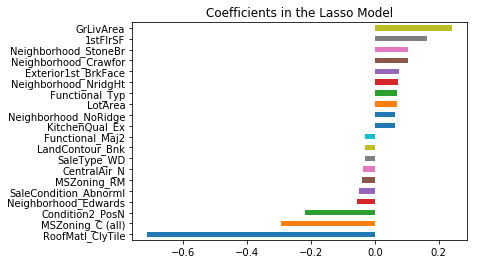

In [48]:

imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")



The most important positive feature is GrLivArea - the above ground area by area square feet. This definitely make sense. Then a few other location and quality features contributed positively. Some of the negative features make less sense and would be worth looking into more - it seems like they might come from unbalanced categorical variables.

We also want to take a look at the residuals as well:

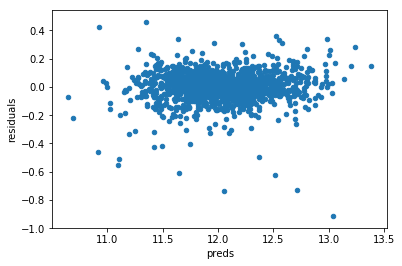

In [51]:
preds = pd.DataFrame({"preds":model_lasso1.predict(all_data), "true":y})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

It seems this model works quiet well.